# Exercise 3: Statistical Learning Theory

## Exercise 3.1: k-nearest-neighbor decision boundary


In this exercise, we will use the [k-nearest-neighbor algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) for a two-class classification problem on a two-dimensional dataset. The data will be generated with the provided function gen_data. Each row in the generated matrix data corresponds to one observation and each column to a single feature. The generated array labels contains the corresponding desired output value of the two-class classification problem.

When done correctly, your code should do the following:
1. Create a random dataset using the function gen_data.
2. Shuffle the data and its corresponding labels.
3. Split the data into a disjoint train and test set.
4. Train multiple k-nearest-neighbor classifiers with different k.
5. Compute and print the train and test accuracy for each k.
6. Visualize the data and the decision boundary of the best classifier with the function show_data.

In case you are struggeling with the task, here are some helpful tips and hints:
1. Useful functions : gen_data, ['permutation'](https://docs.scipy.org/doc/numpy-1.16.1/reference/generated/numpy.random.permutation.html), ['KNeighborsClassifier'](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier), show_data
2. Good initial values are: n_clean=1000, n_noise=500, train_ratio=0.8, n_neighbors=[1,3,11,151,401].

Bonus: Instead of a fixed train-test-split, implement a k-fold cross-validation.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

def gen_data(n_samples, n_noise):
    """
    Generate noisy data.
    
    INPUT:
        n_samples : number of clean samples to generate
        n_noise : number of noisy samples to generate
        
    OUTPUT:
       data : 2D data points
       labels : ndarray of class labels with integer values 0 or 1
    """
    
    #create clean data
    clean_data = np.random.random((n_samples,2))
    tmp = np.linalg.norm(clean_data, axis=1)
    clean_labels = (tmp > 0.8).astype(int)
    
    #create noisy data
    noisy_data = np.random.random((n_noise,2))
    noisy_labels = np.random.randint(0, 2, n_noise)
    
    #merge data
    data = np.concatenate((clean_data, noisy_data), 0)
    labels = np.concatenate((clean_labels, noisy_labels), 0)

    return data, labels

def show_data(data, labels, classifier):
    """
    Show the data and the decision boundary of the classifier.
    
    INPUT:
        data : 2D data points
       labels : ndarray of class labels with integer values 0 or 1
       classifier : trained classification model
        
    OUTPUT:
       fig : plt figure instance
    """
    # create grid
    nx = 10
    ny = 10
    x = np.linspace(0, 1, nx)
    y = np.linspace(0, 1, ny)
    xx, yy = np.meshgrid(x, y)
    xy = np.stack((xx.reshape(-1),yy.reshape(-1)), 1)
    # classify grid points
    predictions = classifier.predict(xy)
    predictions = predictions.reshape(ny, nx)
    
    # plot classification boundary
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(predictions, extent=(0,1,0,1), interpolation='bilinear', cmap='jet', origin='lower')
    fig.colorbar(im)
    # plot data points
    ax.scatter(data[labels==0,0], data[labels==0,1], c=np.array([[0.5, 0.7, 1.]]), marker='o')
    ax.scatter(data[labels==1,0], data[labels==1,1], c=np.array([[1., 0.6, 0.6]]), marker='x')
    
    # write axis labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    return fig

k =   1 	 train_accuracy = 1.000 	 test_accuracy = 0.717
k =   3 	 train_accuracy = 0.866 	 test_accuracy = 0.783
k =  11 	 train_accuracy = 0.834 	 test_accuracy = 0.850
k = 151 	 train_accuracy = 0.812 	 test_accuracy = 0.840
k = 401 	 train_accuracy = 0.793 	 test_accuracy = 0.813


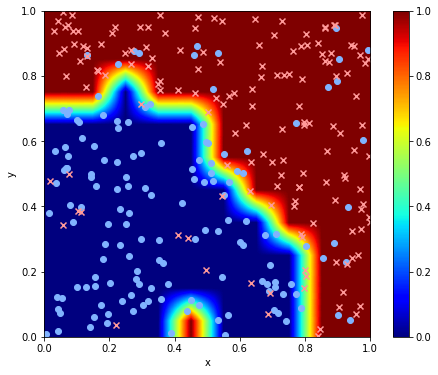

In [ ]:
#set seed for reproducable results
np.random.seed(42)

#TODO: choose number of clean samples
n_clean = 1000

#TODO: choose number of noisy samples
n_noise = 500

#TODO: choose ratio of the training samples
train_ratio = 0.8

#TODO: choose which k to use for nearst-neighbor (create a list with many k)
n_neighbors = [1,3,11,151,401]

"""
Train and visualize the classifier and its decision boundary
"""

#TODO: generate data (gen_data)
data, labels = gen_data(n_clean, n_noise)

#TODO: shuffle the data (np.random.permutation)

permutation = np.random.permutation(len(labels))
labels = labels[permutation]
data = data[permutation,:]

#TODO: split the data into train and test set
size = (int)(len(labels) * train_ratio)

train_data = data[:size]
train_labels = labels[:size]
test_data = data[size:]
test_labels = labels[size:]
#print(test_labels)

# loop over n_neighbors
best_test_accuracy = 0.
for k in n_neighbors:
    #TODO: train knn-classifier (KNeighborsClassifier)
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_data, train_labels)
    #TODO: compute empirical accuracy
    
    train_accuracy = neigh.score(train_data, train_labels)
    
    #TODO: compute test accuracy
    test_accuracy = neigh.score(test_data, test_labels)

    
    # print accuracies
    print('k = {:3d} \t train_accuracy = {:0.3f} \t test_accuracy = {:0.3f}'.format(k, train_accuracy, test_accuracy))
    
    #TODO: save the best classifier
    
    if best_test_accuracy < test_accuracy:
        best_test_accuracy = test_accuracy
        best_classifier = neigh
    
    
#TODO: visualize the data and the decision boundary of the best classifier (show_data)

fig = show_data(test_data, test_labels, best_classifier)

## Exercise 3.2: Comprehension Questions

Answer the following comprehension questions either with right or wrong and briefly explain your decision:

1. In supervised learning, unlike unsupervised learning, there is a desired output value (label) associated with every sample.

True, the label is made by a supervisor. This is were the name is coming from.

2. In classification, unlike regression, the output value takes continuous values.

Wrong, its the other way around.

3. A 1-nearest-neighbor classifier has a low bias (structural risk) and a high variance (sample error).

True, there is low bias because most data is classified correctly and high variance because the classifier overfits.

4. The Vapnik Chervonenkis (VC) dimension is a measure of the complexity of a classifier.

True, because the VC  dimension is just one number that describes the growthfunction $ \prod_{F}$ (p) and therefore the complexity of F.

5. The higher the VC dimension, the better the generalization capability of a classifier.

Wrong

6. The VC dimension of a $k$-nearest-neighbor classifier equals 2 and is independent of $k$.

Wrong, because the VC dimension is the maximum number of points that can be arranged so that f can shatter them (one arrangementof points that can be shattered is sufficient).

7. If the VC dimension is known, Hoeffding's inequality can be used to provide an upper bound on the test error of a classification model.

True, so, we see that the sample error is bounded because it is smaller that two
differences between expectations and means and these two are bounded by
the Hoeffding inequality.

8. Occam's razor states that one should prefer the simplest classifier that explains the data well.

True, because Occam's razor states a simplest explanation is mostly the best.

9. Empirical risk minimization minimizes the average error on the test set.

Wrong, the Empirical risk minimization minimizes the average error on the training set.

10. Structural risk minimization intends to balance the empirical risk and the confidence interval.

True, because the SRM is trying to minize the empirical risk and the confidence interval, which leads to a balance of both.

11. In k-fold cross-validation, the original data is randomly partitioned into k equally sized overlapping subsets.

Wrong, subsets shouldn't be overlapping.